# Examples of usage.


## 1. Extracting a complete synthetic route from a research document (paper+SI).

In [1]:
import os
import pickle

import dspy
from dotenv import load_dotenv

from jasyntho import SynthTree

load_dotenv()

from jasyntho.utils import set_llm

# Set the LLM
model = "claude-3-opus-20240229"
# model = 'gpt-4-turbo'
# model = 'gpt-4-0613'
# model = 'mistral-small-latest'
# model = 'gpt-3.5-turbo'

lm = set_llm(llm_dspy=model)

In [2]:
# 1. Create new tree object

paper_src = "../data/1c10539"
tree = SynthTree.from_dir(paper_src)

# Define the extractor
from jasyntho.extract import Extractor

tree.rxn_extract = Extractor("rxn_setup", model=model)

In [4]:
# 2. Extract products list from original tree object (extract_rss)

# tree.raw_prods = await tree.async_extract_rss()
tree.raw_prods = tree.extract_rss()
tree.products = [p for p in tree.raw_prods if not p.isempty()]

# If saved
# with open(os.path.join(paper_src, "raw_prods_full.tree"), "rb") as f:
#     tree.raw_prods = pickle.load(f)
#     tree.products = [p for p in tree.raw_prods if not p.isempty()]

Total paragraphs: 66
Processed paragraphs: 41
Found 27 empty paragraphs.
	No product found: 3
	Validation error: 24


In [5]:
# 3. # OPTIONAL # . Get list of reachable subgraphs (this gives you a list of connected graphs!)
reach_sgs = tree.partition()
len(reach_sgs)

22

In [10]:
# 4. For each disjoint tree, find extra experimental connections. (make function for this)
new_connects = tree.extended_connections()

# Here we're basically trying to build more edges between substances that couldn't be captured with the basic connection extraction (step 2)
# This new_connects object returns the reasoning behind the new connections
print(new_connects)

Processing reachable subgraph from source node 15
Processing reachable subgraph from source node 22
Processing reachable subgraph from source node 27
Processing reachable subgraph from source node 10
Processing reachable subgraph from source node 37b
Processing reachable subgraph from source node 38a
Processing reachable subgraph from source node S4
Processing reachable subgraph from source node 46a
Processing reachable subgraph from source node 46b
Processing reachable subgraph from source node C16-epi-47
Processing reachable subgraph from source node 30
Processing reachable subgraph from source node 48b
Processing reachable subgraph from source node 50a
Processing reachable subgraph from source node de-I-31
Processing reachable subgraph from source node 2
{'15': {'step 1': Prediction(
    reaction_description='Based on the context provided, fragment 15 was synthesized via a Nicholas etherification reaction followed by a tin hydride promoted cyclization. Specifically:\n\n1. Coupling o

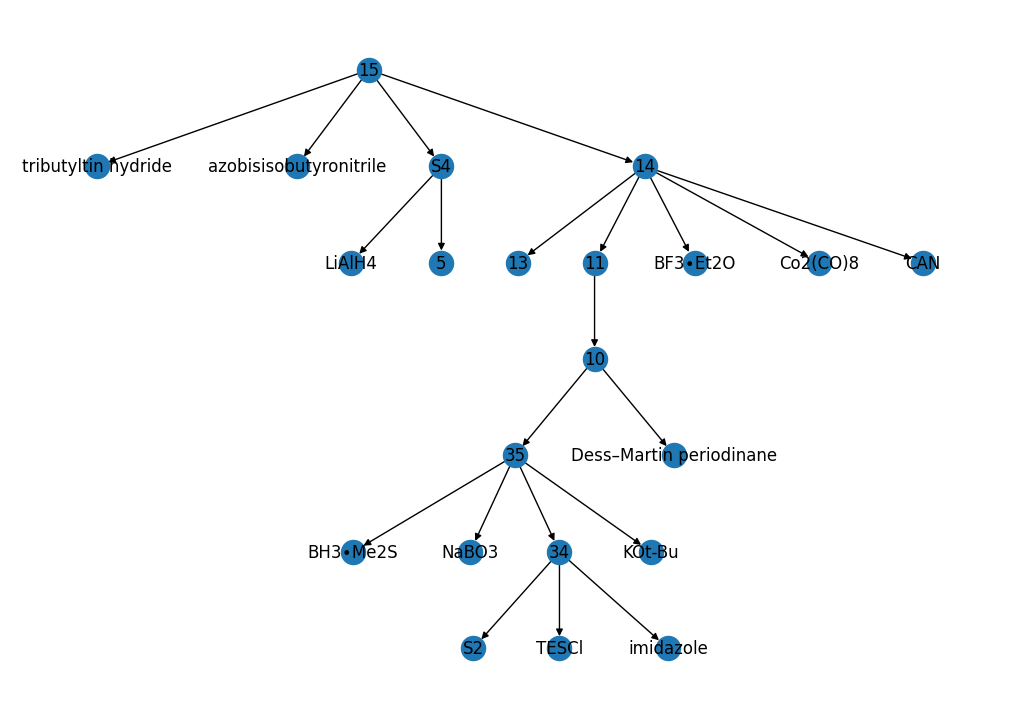

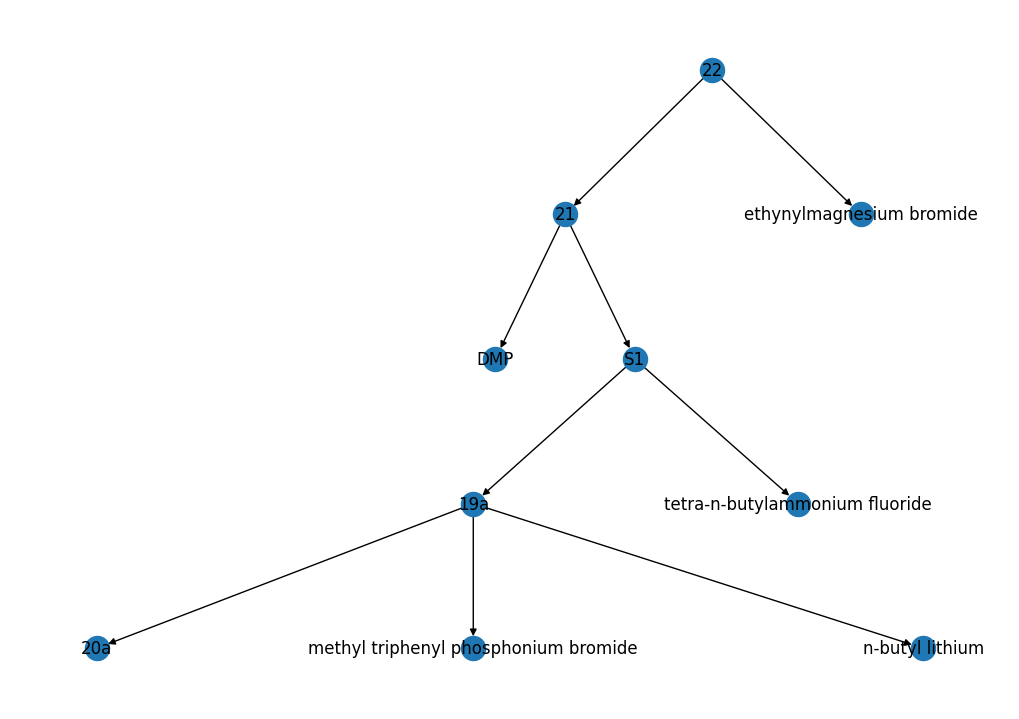

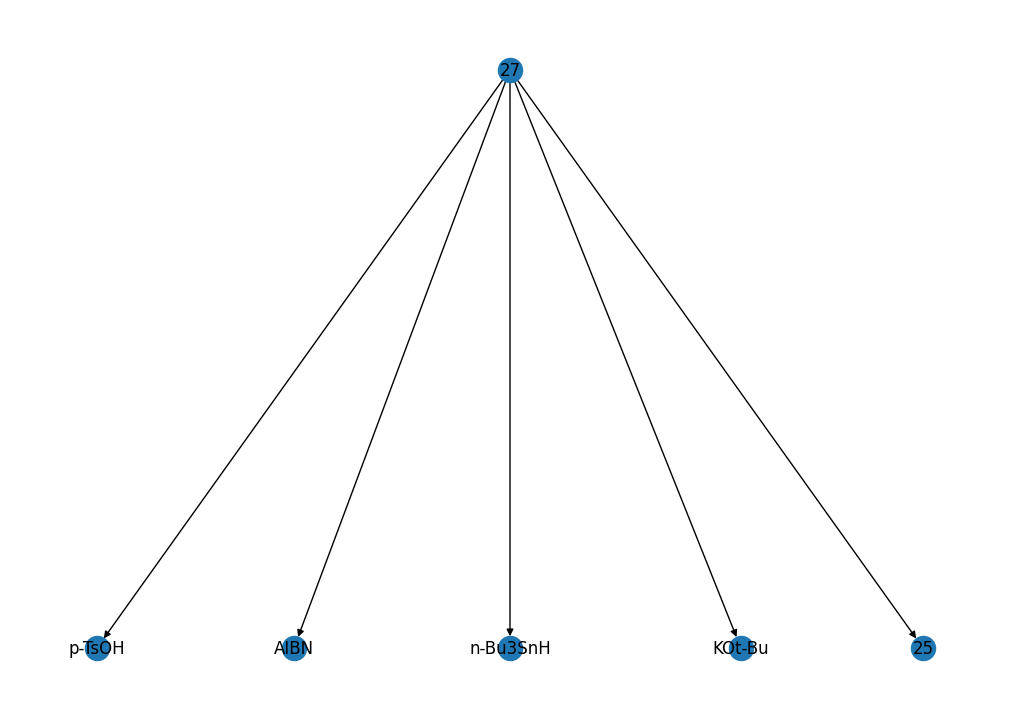

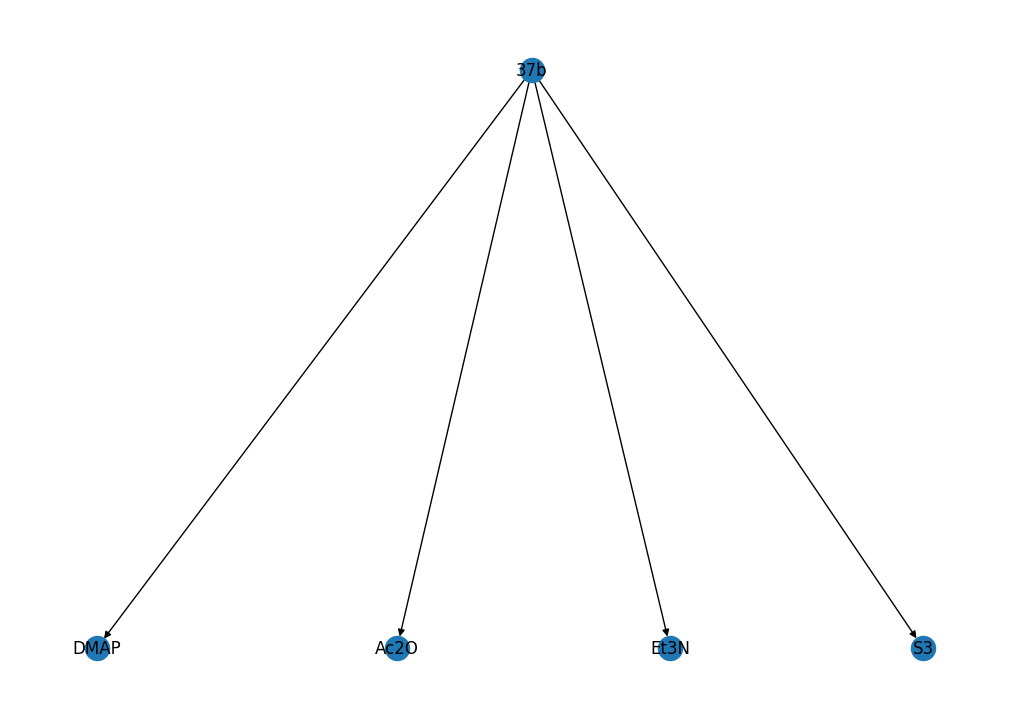

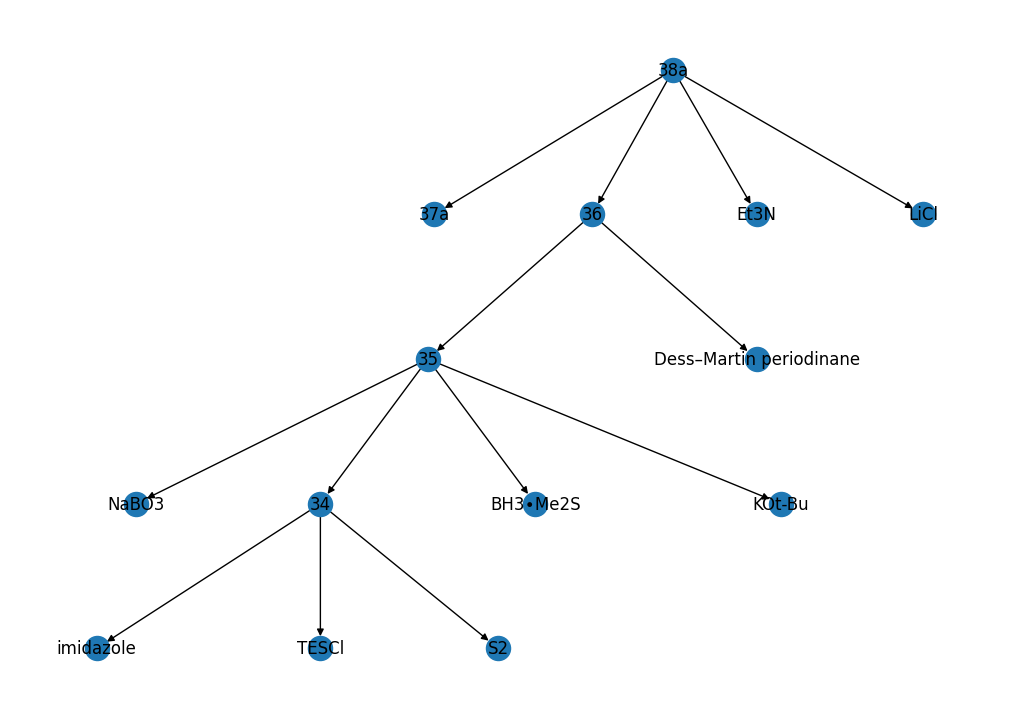

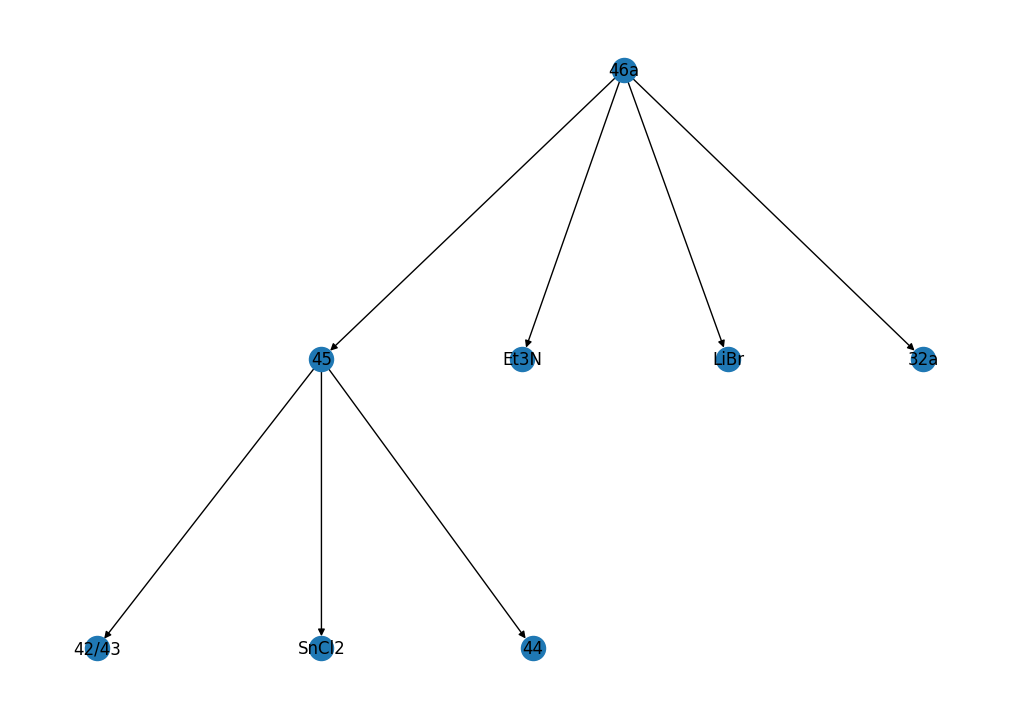

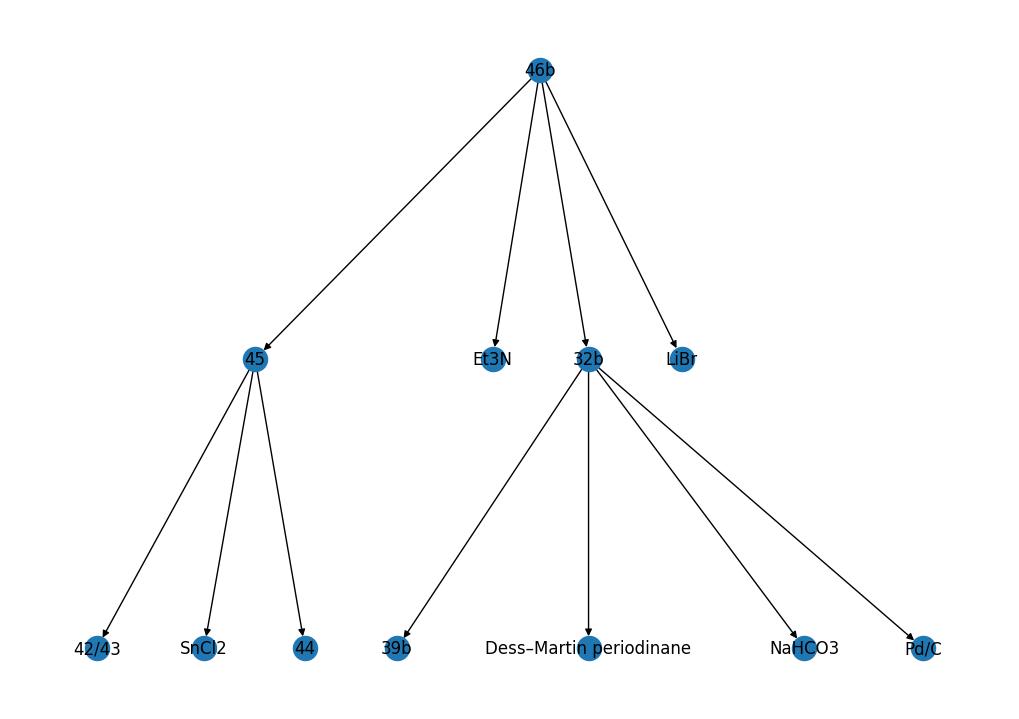

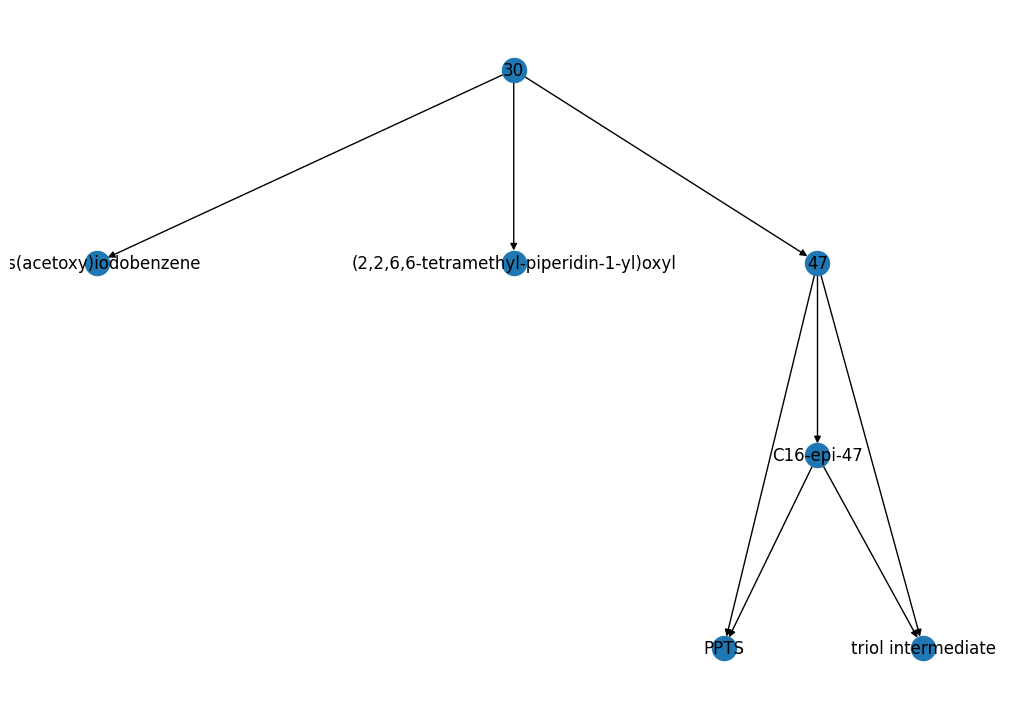

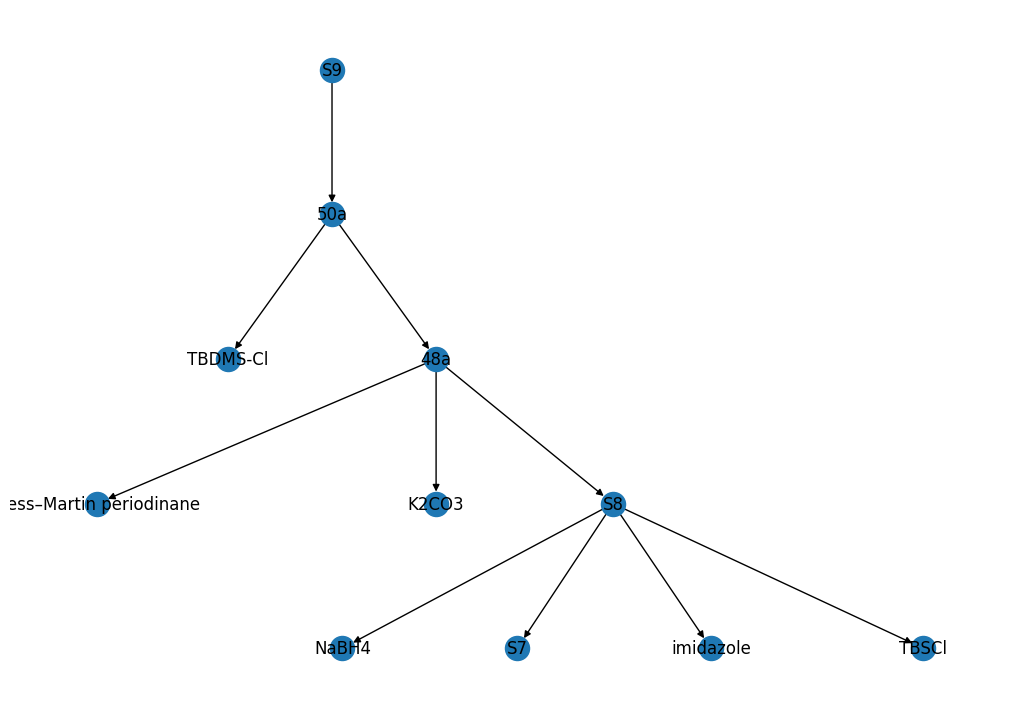

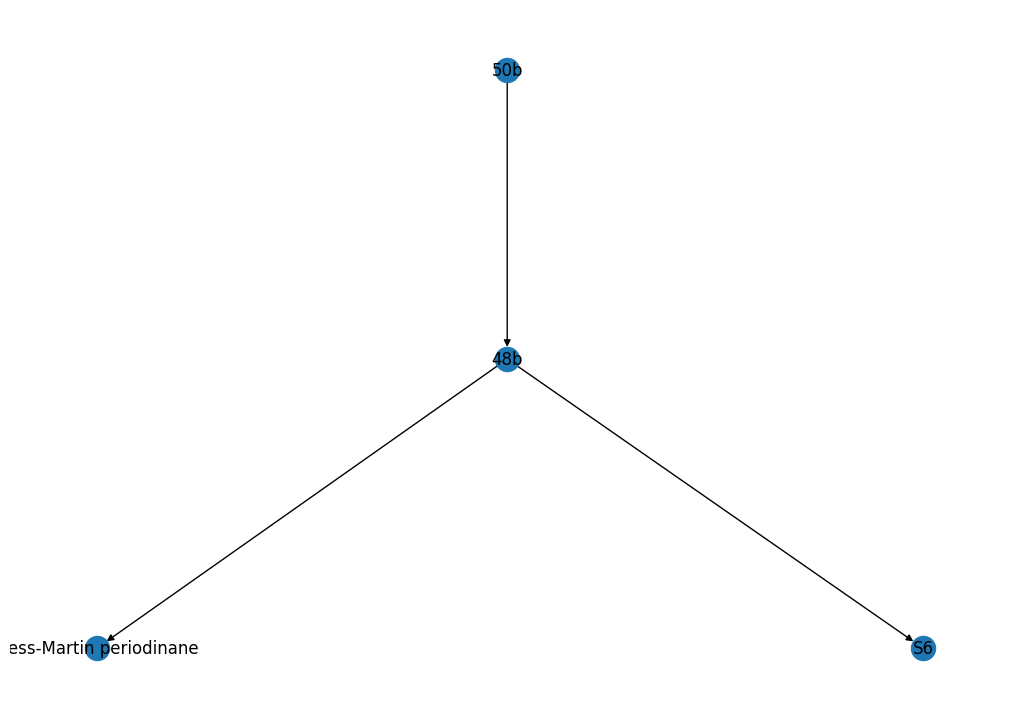

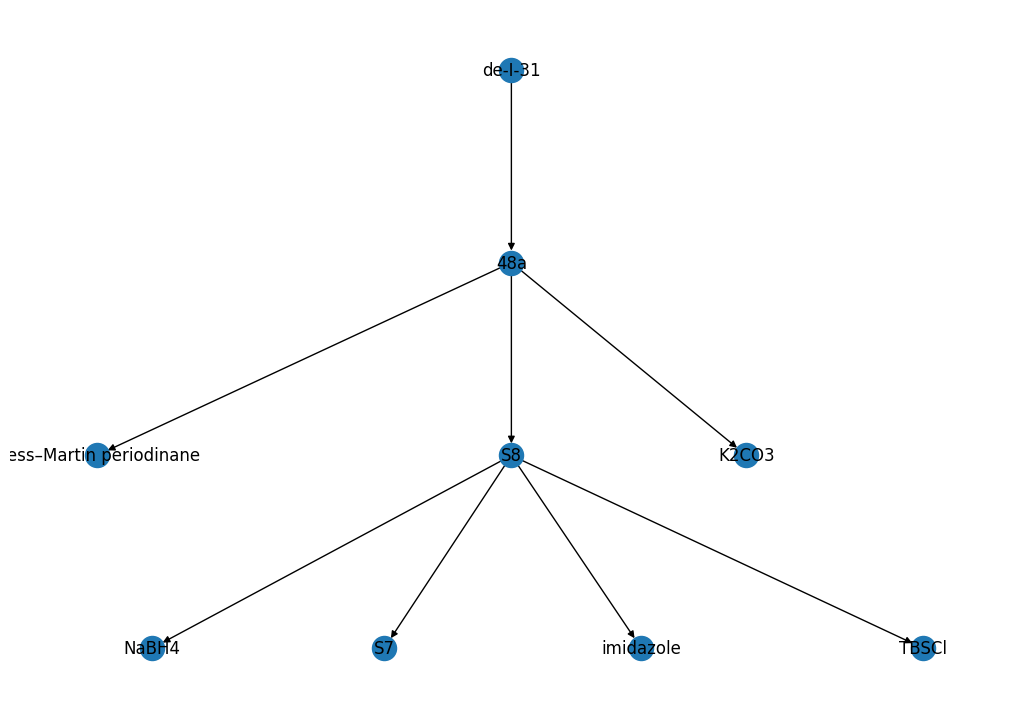

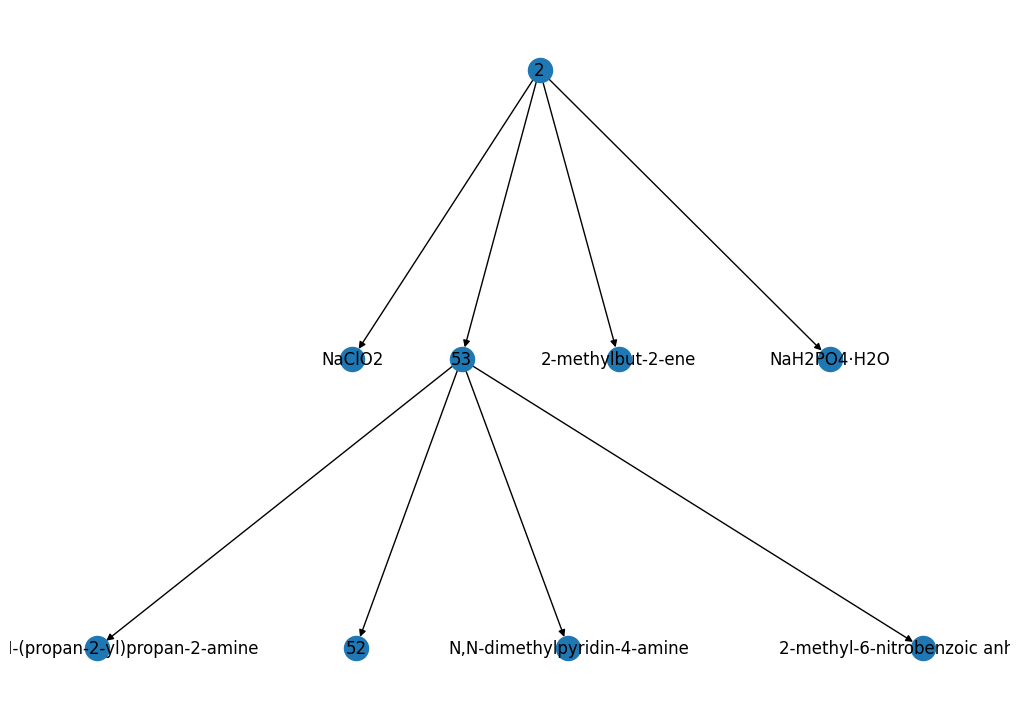

In [11]:
# 4.1 You can always visualize the extracted trees accessing tree.reachable_subgraphs
from jasyntho.utils import plot_graphs

dt = tree.reach_subgraphs
plot_graphs(dt)

In [ ]:
# 5. Get smiles for nodes in tree (only product nodes)
tree.gather_smiles()

key 28. Got iupac name: ['Methyl (16S)-3,7:6,10:12,16-trianhydro-16-[3-(benzyloxy)propyl]-2,5,8,11,14,15-hexadeoxy-14-methyl-D-xylo-β-L-galactadecofuranoside-9,13-diulose']
key exocyclic olefin 26. Got iupac name: ['Methyl 3,7-anhydro-2,5-dideoxy-6-O-(triethylsilyl)-β-L-galacto-octofuranoside', '35']
key 10. Got iupac name: ['Methyl (8S)-2,6-anhydro-4,7-dideoxy-3-O-(triethylsilyl)-D-galacto-octodialdo-8,5-furanoside']
key 36. Got iupac name: ['Methyl (8S)-2,6-anhydro-4,7-dideoxy-3-O-(triethylsilyl)-D-galacto-octodialdo-8,5-furanoside', 'Aldehyde 10']
key 38b. Got iupac name: ['Methyl (8E)-13-O-acetyl-3,7-anhydro-14-O-benzyl-2,5,8,9,11,12-hexadeoxy-12-methyl-6-O-(triethyl-silyl)-D-threo-β-L-galacto-tetradec-8-enofuranosid-10-ulose']
key 42/43. Got iupac name: ['42/43']
key S4. Got iupac name: ['3,7:6,10-dianhydro-2,5,8,11-tetradeoxy-8-methyl-L-arabino-L-galacto-dodecofuranose', 'S4']
key 46b. Got iupac name: ['Methyl (14E)-13-O-acetyl-3,7:18,22:21,25-trianhydro-27-O-[tert-butyl(diphenyl

In [ ]:
# 6. Export into usable json format
# This format is adapted to aizynthfinder's synthesis format. Useful for visualization, GED calcs, etc.

json_format = tree.export()  # gets a json for each disjoint tree
json_format.keys()

dict_keys(['15', '21', '28', 'exocyclic olefin 26', '10', '38b', '42/43', 'S4', 'alcohol 50a', 'De-I-31', 'S9', '50b', 'S10', '2'])

In [ ]:
# 7. Visualize
from rxn_tree_vis.reaction.reactiontree import ReactionTree

key = "28"
t = ReactionTree.from_dict(json[key])
im = t.to_image()
im.save(f"img_{key}.png")